In [2]:
import meep as mp
import numpy as np
import math

cell_size = mp.Vector3(2,2,5)
sx = 2
sy = 2
sz = 4
r = 0.5
h = 1
dpml = 1
eps_si = 3.54**2
eps_pdms = 1.4**2


geometry = [mp.Block(size = mp.Vector3(1,1,4), material = mp.Medium(index = 1.9)),
            mp.Cylinder(radius=r,height=h, material=mp.Medium(index = 3.54))]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z)]
sim = mp.Simulation(resolution=50,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry)

sim.init_sim()

eps_data = sim.get_epsilon()

from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

-----------
Initializing structure...


In [1]:
import meep as mp
import numpy as np
import math



sx = 2
sy = 2
sz = 5
x = sx - 0.1
y = sy - 0.1
z = sz - 0.1
r = 0.5
h = 1
dpml = 1
eps_si = 3.54**2
eps_pdms = 1.4**2
b_m = 3
c_m = 4

cell_size = mp.Vector3(sx,sy,sz)
geometry = [mp.Block(size = cell_size, material=mp.Medium(index=b_m)),
            mp.Cylinder(radius=r,height=h, material=mp.Medium(index = c_m))]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z)]
fcen = 1.5
df = 0.25
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                component = mp.Ex,
                center = mp.Vector3(0,0,-(sz/2 - dpml - 0.5)),
                size = mp.Vector3(sx,sy,0)
               )]
sim = mp.Simulation(resolution=20,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=src,
                    geometry=geometry)
freg = mp.FluxRegion(center=mp.Vector3(0,0,sz/2-dpml-0.5),
                     size = mp.Vector3(sx,sy,0)
                    )
nfreq = 500
trans = sim.add_flux(fcen, df, nfreq, freg)


In [2]:
sim.run(until = 1000)
bend = mp.get_fluxes(trans)


-----------
Initializing structure...
Meep progress: 4.925000000000001/1000.0 = 0.5% done in 4.0s, 815.1s to go
Meep progress: 10.075000000000001/1000.0 = 1.0% done in 8.0s, 790.8s to go
Meep progress: 15.775/1000.0 = 1.6% done in 12.1s, 752.7s to go
Meep progress: 21.325000000000003/1000.0 = 2.1% done in 16.1s, 737.9s to go
Meep progress: 27.025000000000002/1000.0 = 2.7% done in 20.1s, 723.2s to go
Meep progress: 32.75/1000.0 = 3.3% done in 24.1s, 711.8s to go
Meep progress: 38.400000000000006/1000.0 = 3.8% done in 28.1s, 703.8s to go
Meep progress: 44.150000000000006/1000.0 = 4.4% done in 32.1s, 695.2s to go
Meep progress: 49.85/1000.0 = 5.0% done in 36.1s, 688.5s to go
Meep progress: 55.400000000000006/1000.0 = 5.5% done in 40.1s, 684.2s to go
Meep progress: 61.150000000000006/1000.0 = 6.1% done in 44.1s, 677.8s to go
Meep progress: 66.875/1000.0 = 6.7% done in 48.2s, 671.9s to go
Meep progress: 72.65/1000.0 = 7.3% done in 52.2s, 665.9s to go
Meep progress: 78.375/1000.0 = 7.8% done

Meep progress: 667.4250000000001/1000.0 = 66.7% done in 473.1s, 235.8s to go
Meep progress: 673.2/1000.0 = 67.3% done in 477.1s, 231.6s to go
Meep progress: 679.0250000000001/1000.0 = 67.9% done in 481.1s, 227.4s to go
Meep progress: 684.7750000000001/1000.0 = 68.5% done in 485.2s, 223.3s to go
Meep progress: 690.5500000000001/1000.0 = 69.1% done in 489.2s, 219.2s to go
Meep progress: 696.35/1000.0 = 69.6% done in 493.2s, 215.0s to go
Meep progress: 701.825/1000.0 = 70.2% done in 497.2s, 211.2s to go
Meep progress: 707.6/1000.0 = 70.8% done in 501.2s, 207.1s to go
Meep progress: 713.1500000000001/1000.0 = 71.3% done in 505.2s, 203.2s to go
Meep progress: 718.9000000000001/1000.0 = 71.9% done in 509.2s, 199.1s to go
Meep progress: 724.725/1000.0 = 72.5% done in 513.2s, 194.9s to go
Meep progress: 730.5250000000001/1000.0 = 73.1% done in 517.2s, 190.8s to go
Meep progress: 736.325/1000.0 = 73.6% done in 521.2s, 186.6s to go
Meep progress: 742.2/1000.0 = 74.2% done in 525.2s, 182.4s to go

In [15]:
bend

[-0.05696124400778481,
 -0.05688827202582818,
 -0.05677890556398024,
 -0.05665376945774766,
 -0.05651067170711613,
 -0.05637114001175646,
 -0.05628552356974658,
 -0.05610433792820383,
 -0.05590451727899889,
 -0.055693452870881836,
 -0.05546910990625973,
 -0.05523040379744132,
 -0.0549769522406648,
 -0.054708849767684815,
 -0.05442661306027067,
 -0.0541312179997178,
 -0.05382420150597247,
 -0.05350782117501594,
 -0.05318526379036077,
 -0.05286087046648503,
 -0.05254025503866098,
 -0.05222988228667742,
 -0.0519347635545771,
 -0.05165077773368218,
 -0.051346056231257035,
 -0.050940470050372964,
 -0.05035728210936962,
 -0.04965862671877558,
 -0.04892190665600688,
 -0.04829090317544221,
 -0.0477450322274814,
 -0.04714026297304522,
 -0.046480903975857496,
 -0.04570849962267468,
 -0.044780357962712174,
 -0.04395985256712005,
 -0.04320926016968642,
 -0.042508101923720024,
 -0.041848116253143886,
 -0.04122607183431477,
 -0.04064118014377904,
 -0.04009399401972924,
 -0.03958593898183737,
 -0.039

In [38]:
sim.init_sim()

eps_data = sim.get_epsilon()

from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

In [3]:
sim.reset_meep()
sx = 2
sy = 2
sz = 4
r = 0.5
h = 1
dpml = 1
eps_si = 3.54**2
eps_pdms = 1.4**2

cell_size = mp.Vector3(sx,sy,sz)
geometry = [mp.Block(size = mp.Vector3(sx,sy,sz), material=mp.Medium(index=b_m)),
            #mp.Prism(vertices, height=1.0, material=mp.Medium(index=3.5)),
            #mp.Cylinder(radius=r,height=h, material=mp.Medium(epsilon = eps_si))
           ]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z)]
fcen = 1.5
df = 0.25
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                component = mp.Ex,
                center = mp.Vector3(0,0,-(sz/2 - dpml - 0.5)),
                size = mp.Vector3(sx,sy,0)
               )]
sim = mp.Simulation(resolution=20,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=src,
                    geometry=geometry)
freg = mp.FluxRegion(center=mp.Vector3(0,0,sz/2-dpml-0.5),
                     size = mp.Vector3(sx,sy,0)
                    )
nfreq = 500
trans = sim.add_flux(fcen, df, nfreq, freg)


In [4]:
sim.run(until = 1000)
straight = mp.get_fluxes(trans)
flux_freqs = mp.get_flux_freqs(trans)

-----------
Initializing structure...
Meep progress: 5.7/1000.0 = 0.6% done in 4.0s, 698.9s to go
Meep progress: 11.75/1000.0 = 1.2% done in 8.0s, 673.6s to go
Meep progress: 17.775000000000002/1000.0 = 1.8% done in 12.0s, 664.3s to go
Meep progress: 22.85/1000.0 = 2.3% done in 16.0s, 685.7s to go
Meep progress: 28.775000000000002/1000.0 = 2.9% done in 20.0s, 676.4s to go
Meep progress: 34.325/1000.0 = 3.4% done in 24.1s, 676.8s to go
Meep progress: 40.25/1000.0 = 4.0% done in 28.1s, 669.5s to go
Meep progress: 46.175000000000004/1000.0 = 4.6% done in 32.1s, 662.9s to go
Meep progress: 52.300000000000004/1000.0 = 5.2% done in 36.1s, 654.1s to go
Meep progress: 58.35/1000.0 = 5.8% done in 40.1s, 647.2s to go
Meep progress: 64.45/1000.0 = 6.4% done in 44.1s, 640.3s to go
Meep progress: 69.925/1000.0 = 7.0% done in 48.1s, 640.0s to go
Meep progress: 76.05/1000.0 = 7.6% done in 52.1s, 633.4s to go
Meep progress: 81.325/1000.0 = 8.1% done in 56.2s, 634.4s to go
Meep progress: 87.35000000000

Meep progress: 654.975/1000.0 = 65.5% done in 1698.8s, 894.9s to go
Meep progress: 661.0250000000001/1000.0 = 66.1% done in 1702.8s, 873.2s to go
Meep progress: 666.6750000000001/1000.0 = 66.7% done in 1706.8s, 853.4s to go
Meep progress: 672.75/1000.0 = 67.3% done in 1710.8s, 832.2s to go
Meep progress: 678.825/1000.0 = 67.9% done in 1714.8s, 811.3s to go
Meep progress: 684.9250000000001/1000.0 = 68.5% done in 1718.8s, 790.7s to go
Meep progress: 691.0250000000001/1000.0 = 69.1% done in 1722.9s, 770.3s to go
Meep progress: 697.125/1000.0 = 69.7% done in 1726.9s, 750.3s to go
Meep progress: 703.1750000000001/1000.0 = 70.3% done in 1730.9s, 730.6s to go
Meep progress: 709.0500000000001/1000.0 = 70.9% done in 1734.9s, 711.9s to go
Meep progress: 715.0500000000001/1000.0 = 71.5% done in 1738.9s, 693.0s to go
Meep progress: 721.1500000000001/1000.0 = 72.1% done in 1742.9s, 673.9s to go
Meep progress: 727.2/1000.0 = 72.7% done in 1746.9s, 655.3s to go
Meep progress: 733.3000000000001/1000.0

In [ ]:
sim.init_sim()

eps_data = sim.get_epsilon()

from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

In [8]:
straight

[2.450427197037822e-22,
 2.391281265145376e-22,
 2.318046575501601e-22,
 2.2300404354390758e-22,
 2.126599010711167e-22,
 2.0070815961282959e-22,
 1.870875051748676e-22,
 1.7173983862549116e-22,
 1.5461074773254894e-22,
 1.3564999129476459e-22,
 1.1481199349480168e-22,
 9.205634733640866e-23,
 6.734832430231631e-23,
 4.0659388756733345e-23,
 1.196771501858176e-23,
 -1.8741295834489836e-23,
 -5.147450251153508e-23,
 -8.623051363071559e-23,
 -1.2299918766095855e-22,
 -1.6176114199381489e-22,
 -2.024872777502126e-22,
 -2.4513832047129566e-22,
 -2.896643813685439e-22,
 -3.3600454239175054e-22,
 -3.840864677121962e-22,
 -4.338260460633854e-22,
 -4.851270662089055e-22,
 -5.378809301867436e-22,
 -5.919664067099924e-22,
 -6.472494288461106e-22,
 -7.035829390497118e-22,
 -7.60806785149485e-22,
 -8.187476700605349e-22,
 -8.772191592064392e-22,
 -9.360217477261925e-22,
 -9.949429911516348e-22,
 -1.0537577021644422e-21,
 -1.1122282149204207e-21,
 -1.1701047217823294e-21,
 -1.2271256815227583e-21,


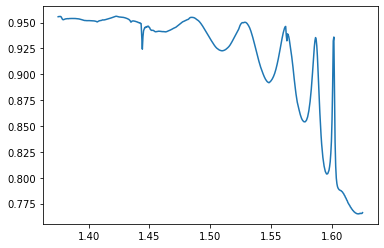

In [6]:
import matplotlib.pyplot as plt
Ts = []
wl = []
for i in range(nfreq):
    wl = np.append(wl, flux_freqs[i])
    Ts = np.append(Ts, bend[i]/straight[i])
plt.figure()
#plt.ylim(-1,1)
plt.plot(wl,Ts)